<a href="https://colab.research.google.com/github/elekanshola/raphaelshola/blob/main/Gaussian%20Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
train_data = pd.read_csv('/content/MNIST_train.csv')
test_data = pd.read_csv('/content/MNIST_test.csv')





FileNotFoundError: [Errno 2] No such file or directory: '/content/MNIST_train.csv'

#Transforming to Numpy arrays

In [ ]:
X = train_data.to_numpy()
X

array([[    0,     0,     5, ...,     0,     0,     0],
       [    1,     1,     0, ...,     0,     0,     0],
       [    2,     2,     4, ...,     0,     0,     0],
       ...,
       [59997, 59997,     5, ...,     0,     0,     0],
       [59998, 59998,     6, ...,     0,     0,     0],
       [59999, 59999,     8, ...,     0,     0,     0]])

In [ ]:
y= X[:,2]
y

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
y.shape

(60000,)

In [ ]:
X=X[:,3:]

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(60000, 784)

In [ ]:
X = np.divide(X,255)

In [ ]:
Xt = test_data.to_numpy()
Xt

array([[   0,    0,    7, ...,    0,    0,    0],
       [   1,    1,    2, ...,    0,    0,    0],
       [   2,    2,    1, ...,    0,    0,    0],
       ...,
       [9997, 9997,    4, ...,    0,    0,    0],
       [9998, 9998,    5, ...,    0,    0,    0],
       [9999, 9999,    6, ...,    0,    0,    0]])

In [ ]:
yt= Xt[:,2]
yt

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
yt.shape

(10000,)

In [ ]:
Xt=Xt[:,3:]

In [ ]:
Xt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Xt.shape

(10000, 784)

In [ ]:
Xt= np.divide(Xt,255)

In [ ]:
from scipy.stats import multivariate_normal as mvn


In [ ]:
class GaussNB():
  def fit(self, X, y, epsilon=1e-3):
   self.likelihoods=dict()
   self.priors= dict()
   self.K=set(y.astype(int))

   for k in self.K:
    X_k=X[y==k]
   # (X_k.shape)
    self.likelihoods[k]={'mean':X_k.mean(axis=0), 'cov':X_k.var(axis=0)+epsilon}
    self.priors[k]= len(X_k)/len(X)

  def predict(self, X):
    N,D = X.shape
    P_hat= np.zeros((N,len(self.K)) )

    for k, l in self.likelihoods.items():
      P_hat[:, k ]=mvn.logpdf(X, l['mean'], l['cov'])+ np.log(self.priors[k])

    return P_hat.argmax(axis=1)




In [ ]:
gnb=GaussNB()

In [ ]:
gnb.fit(X,y)


In [ ]:
y_hat= gnb.predict(X)

In [ ]:
def accuracy (y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
accuracy(y,y_hat)

0.7682333333333333

In [ ]:
yt_hat= gnb.predict(Xt)

In [ ]:
accuracy(yt,yt_hat)

0.7746

In [ ]:
class GaussBayes():

  def fit(self, X,y,epsilon=1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K=set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]

      N_k,D = X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self,X):
      N,D = X.shape
      p_hat = np.zeros((N,len(self.K)))

      for k,l in self.likelihoods.items():
        p_hat[:,k] = mvn.logpdf(X,l["mean"], l["cov"]) + np.log(self.priors[k])
      return p_hat.argmax(axis=1)









In [ ]:
gaussbayes = GaussBayes()

In [ ]:
gaussbayes.fit(X, y, epsilon =1e-3)


In [ ]:
y_hat_bayes = gaussbayes.predict(X)

In [ ]:
accuracy(y, y_hat_bayes)

0.9306333333333333

In [ ]:
yt_hat_bayes = gaussbayes.predict(Xt)

In [ ]:
accuracy(yt, yt_hat_bayes)

0.9108

In [ ]:
import seaborn as sns

Text(0.5, 47.7222222222222, 'Predicted label')

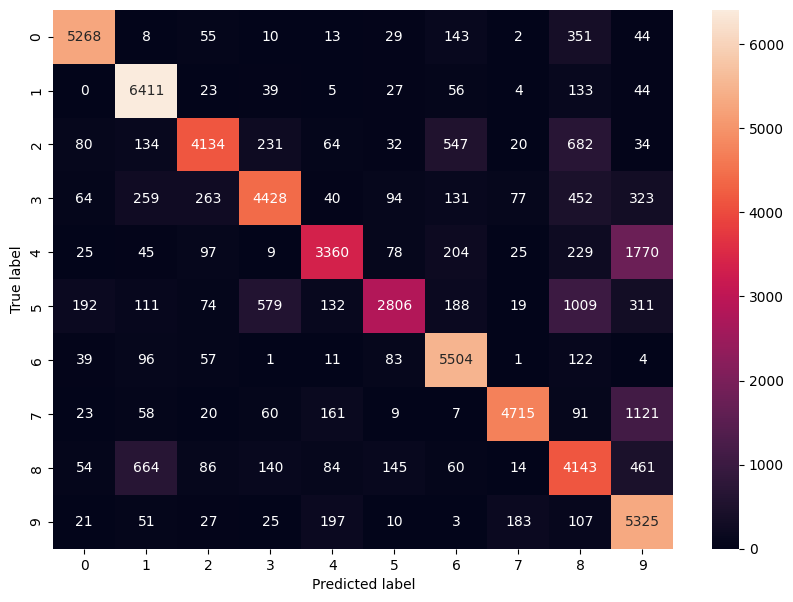

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')